### Consigna
<div class="alert alert-block alert-info">
    <b>1-</b> Estudiar una implementación de un algoritmo de clustering en alguna librería (por ejemplo, Scikit Learn).<br>
    <b>2-</b> Cargar el conjunto de datos que se ofrece a continuación y graficarlo.<br>
    <b>3-</b> Considerando 3 grupos, tomar solo el 20% de los datos para disminuir la cantidad, considerando los más representativos.<br>
    <b>4-</b> Calcular la distancia intracluster del conjunto total de los datos y del conjunto reducido.<br>

Vamos a resolver la consigna con scikit learn , para ver como aplicamos el algoritmo miramos la documentacion <br>
de la pagina 

<div class="alert alert-block alert-info">
    <b>class sklearn.cluster.KMeans</b>(n_clusters=8, *, init='k-means++', n_init=10, max_iter=300, tol=0.0001, verbose=0, random_state=None, copy_x=True, algorithm='lloyd')
    
</div>

- https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.fit

Cargamos el conjunto de datos en un csv


In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

In [36]:
df = pd.read_csv("/Users/tomas/Desktop/Facultad/Cuarto/2doCuatri/IA-Facultad/clase1/datos3.csv",sep=';')

# IMPORTANTE: La lectura de datos en este caso era exponencial para poder pasarla a numeros en numpy necesitamos pasar la E a e
# y la , tiene que ser un .
dfTransformed= df.replace('E','e', regex = True).replace(',','.', regex = True)
X = dfTransformed.to_numpy().astype(float)

array([[39000000., 15700000.],
       [39700000., 32800000.],
       [30600000.,  1690000.],
       ...,
       [91700000., 79100000.],
       [90400000., 68000000.],
       [64300000., 71500000.]])

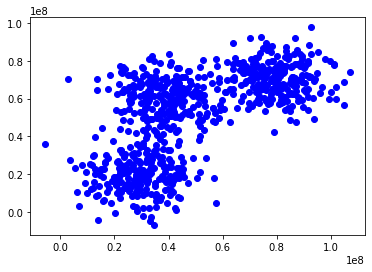

In [55]:
plt.scatter(X[:,0] ,X[:,1], color = 'blue')

150


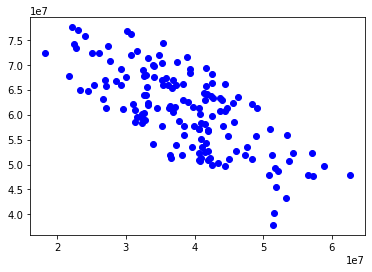

In [99]:
# Para tomar el %20 mas representativo vamos a sacar el promedio de los puntos 
# y nos quedamos con el %20 mas cercano

averagePoint = np.average(X, axis = 0)

# Saco la distancia euclidiana de todos los puntos al promedio

def distance(x1,x2):
            return np.sqrt(np.sum(x1-x2)**2)

n_samples, n_features = X.shape
percentaje = round(n_samples * 0.2)
print(percentaje)
distances = [ [distance(X[i], averagePoint)] for i in range(n_samples)]

#Me quedo con las distancias mas chicas 
# Numpy sigue siendo recontra clave y tiene una funcion que se llama argsort que me los ordena 
# pero me los deja con el indice original

distances = np.concatenate(distances)
argDistances = np.argsort(distances)

shortData = X[argDistances[:percentaje]]
shortData

#Si miramos la figura nos damos cuenta que tiene una forma parecida a los datos del centro.
plt.scatter(shortData[:,0] ,shortData[:,1], color = 'blue')

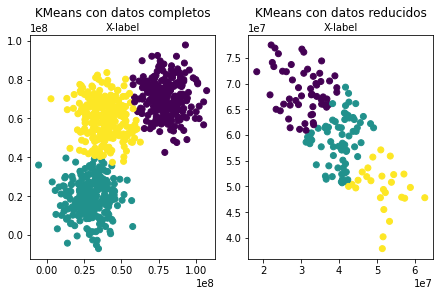

array([[68434435.63236272, 10521900.82998577, 44396595.24499763],
       [55102987.76218941, 17414964.95785914, 27321332.33570695],
       [84709140.5240308 , 17423541.73828289, 58930421.99522796],
       ...,
       [14660294.00523741, 86806516.8631685 , 56527212.45093502],
       [11102020.551233  , 78511298.6885799 , 52534414.29171114],
       [15363605.70699457, 63216362.72037937, 28242010.44053243]])

In [130]:
kmeans1 = KMeans(n_clusters=3, random_state=0).fit_predict(X)
kmeans2 = KMeans(n_clusters=3, random_state=0).fit_predict(shortData)
#Este metodo devuelve un array con el indice al cluster al que pertecene 
# 0 ---> pertenece al cluster 1
# 1 ---> pertenece al cluster 2

fig, axs = plt.subplots(1, 2, constrained_layout=True)

ax = axs[0]
ax.plot(range(10))
ax.scatter(X[:,0] ,X[:,1], c = kmeans1 )
ax.xaxis.set_label_position('top')
ax.set_xlabel('X-label')
ax.set_title('KMeans con datos completos')


ax = axs[1]
ax.scatter(shortData[:,0] ,shortData[:,1], c = kmeans2 )
ax.xaxis.set_label_position('top')
ax.set_xlabel('X-label')
ax.set_title('KMeans con datos reducidos')

plt.show()

# Para graficar si uso c en vez de color pone un color dependiendo el valor del array.

In [134]:
#Obtengo la distancia a los clusters con el metodo transform 

kmeansDistance1 = KMeans(n_clusters=3, random_state=0).fit_transform(X)
kmeansDistance2 = KMeans(n_clusters=3, random_state=0).fit_transform(shortData)

#Como son 3 clusters obtengo un vector con la distancia hacia cada cluster 

print(kmeansDistance1)

[[68434435.63236272 10521900.82998577 44396595.24499763]
 [55102987.76218941 17414964.95785914 27321332.33570695]
 [84709140.5240308  17423541.73828289 58930421.99522796]
 ...
 [14660294.00523741 86806516.8631685  56527212.45093502]
 [11102020.551233   78511298.6885799  52534414.29171114]
 [15363605.70699457 63216362.72037937 28242010.44053243]]
